<a href="https://colab.research.google.com/github/rohitm487/Causal_Inference_in_Python/blob/main/3_Causal_Inference_Difference_In_Difference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Simulate a Difference in Difference dataset
def sim_diff_in_diff_df():
    np.random.seed(42)

    n = 100
    # Create time periods (0 for pre, 1 for post)
    Time = np.repeat([0, 1], n // 2)
    # Create country indicator (0 for US, 1 for AU)
    Country = np.tile([0, 1], n // 2)

    # Counterfactual revenue (what would have happened without the intervention)
    Counterfactual = 100 + Time * 10 + Country * 20

    # Revenue is affected by an interaction between time and country
    Revenue = Counterfactual + Time * Country * 40 + np.random.normal(0, 10, n)

    return pd.DataFrame({
        'Time': Time,
        'Country': Country,
        'Revenue': Revenue,
        'Counterfactual': Counterfactual
    })

# Generate the dataset
dat = sim_diff_in_diff_df()

# Explore the dataset
print(dat.head())


   Time  Country     Revenue  Counterfactual
0     0        0  104.967142             100
1     0        1  118.617357             120
2     0        0  106.476885             100
3     0        1  135.230299             120
4     0        0   97.658466             100


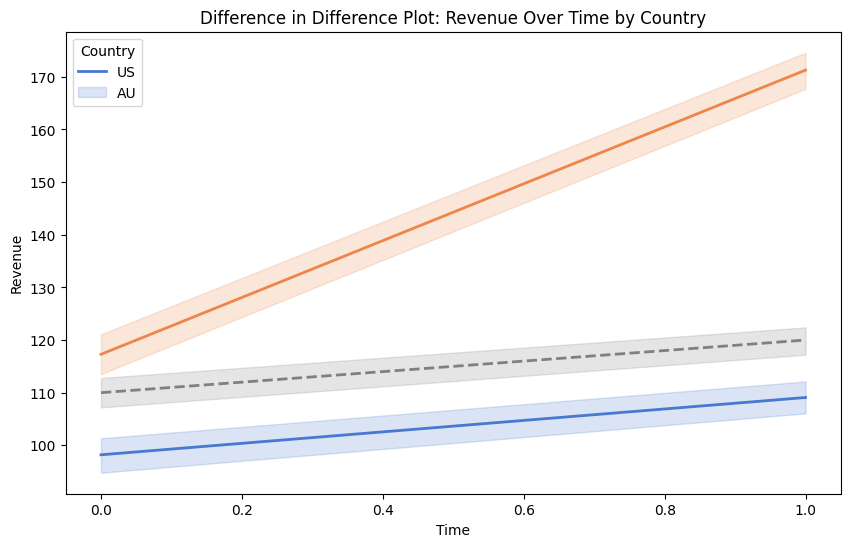

In [ ]:
# Plot the data to see the trends in revenue over time for both countries
plt.figure(figsize=(10, 6))
sns.lineplot(x='Time', y='Revenue', hue='Country', data=dat, linewidth=2, palette='muted')
sns.lineplot(x='Time', y='Counterfactual', data=dat, linestyle='--', linewidth=2, color='gray')
plt.xlabel("Time")
plt.ylabel("Revenue")
plt.title("Difference in Difference Plot: Revenue Over Time by Country")
plt.legend(title="Country", labels=["US", "AU"])
plt.show()


In [ ]:
# Fit the difference in difference model
# The interaction between Time and Country represents the treatment effect (causal impact)
dat['Interaction'] = dat['Time'] * dat['Country']

# OLS regression model
model = ols('Revenue ~ Time + Country + Interaction', data=dat).fit()

# View the model summary
print(model.summary())

# Causal impact is the coefficient of the Interaction term
causal_impact = model.params['Interaction']
print(f"Causal Impact (Difference in Difference estimate): {causal_impact:.2f}")


                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     318.9
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           9.04e-50
Time:                        07:15:30   Log-Likelihood:                -360.66
No. Observations:                 100   AIC:                             729.3
Df Residuals:                      96   BIC:                             739.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      98.2021      1.820     53.966      


###  **Explaining the Difference in Difference**:

$
\text{DiD} = (\text{Revenue in AU Post} - \text{Revenue in AU Pre}) - (\text{Revenue in US Post} - \text{Revenue in US Pre})
$
------------------

This corresponds to the **Interaction** term in the model, which captures the **causal effect** of the intervention (or policy change).

By fitting this model, you're effectively controlling for trends over time that are common to both countries, as well as any baseline differences between countries, isolating the **effect of the intervention**.

# Problems of Diffrence in Difference

- **Synthetic control** - wighted avg of many diffrent control groups.

In R language - There is synth, Causal Impact packages for this.